In [1]:
#install pyopenms
!pip install pyopenms

In [21]:
import pyopenms

from pyopenms import ElementDB

In [22]:
# print Avogadro's number
print(pyopenms.Constants.AVOGADRO)

6.0221367e+23


In [32]:
edb = ElementDB()
edb.hasElement("H")

True

In [33]:
hydrogen = edb.getElement("H")

print(hydrogen.getName())

print(hydrogen.getSymbol())

print(hydrogen.getMonoWeight())

print(hydrogen.getAverageWeight())


print ("One mole of oxygen weighs", 2*hydrogen.getAverageWeight(), "grams")

Hydrogen
H
1.0078250319
1.0079407537260314
One mole of oxygen weighs 2.015881507452063 grams


In [35]:
print(hydrogen.getIsotopeDistribution())
Iso=hydrogen.getIsotopeDistribution()

print(Iso.getContainer())

[<pyopenms.pyopenms_6.Peak1D object at 0x000001D2A97F8DB0>, <pyopenms.pyopenms_6.Peak1D object at 0x000001D2A98C73B0>, <pyopenms.pyopenms_6.Peak1D object at 0x000001D2A98C7150>]


In [37]:
############## Hydrogen Isotopes H1 & H2 & H3 ####################
edb = ElementDB()

hydrogen_isoDist = {"mass": [], "abundance": []}

hydrogen = edb.getElement("H")


isotopes = hydrogen.getIsotopeDistribution()

for iso in isotopes.getContainer():
    print ("Hydrogen isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    hydrogen_isoDist["mass"].append(iso.getMZ())
    hydrogen_isoDist["abundance"].append((iso.getIntensity() * 100))

Hydrogen isotope 1.0078250319 has abundance 99.98850226402283 %
Hydrogen isotope 2.01410178 has abundance 0.011500000255182385 %
Hydrogen isotope 3.01604927 has abundance 0.0 %


In [38]:
edb = ElementDB()
edb.hasElement("C")

True

In [46]:
############## Carbon Isotopes C12 & C13#####################
edb = ElementDB()

carbon_isoDist = {"mass": [], "abundance": []}

carbon = edb.getElement("C")


isotopes = carbon.getIsotopeDistribution()

for iso in isotopes.getContainer():
    print ("Carbon isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    carbon_isoDist["mass"].append(iso.getMZ())
    carbon_isoDist["abundance"].append((iso.getIntensity() * 100))

Carbon isotope 12.0 has abundance 98.9300012588501 %
Carbon isotope 13.003355 has abundance 1.0700000450015068 %


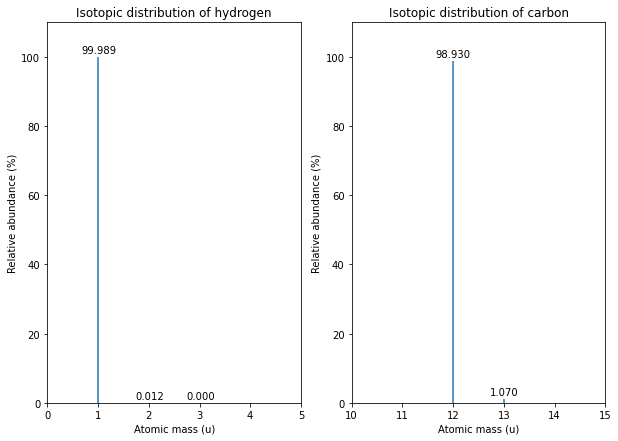

In [48]:
#  The isotope distribution of htdrogen and carbon can be displayed with the following extra code:
import math
from matplotlib import pyplot as plt

def Text(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate('%0.3f' % (y2), xy=(x2, y2), xytext=(x2+0.5,y2+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')
    else:
        plt.annotate('%0.3f' % (y1), xy=(x1, y1), xytext=(x1+0.5,y1+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')


def Distribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i])
        if int(distribution["mass"][i - 1]) == int(distribution["mass"][i]) \
                and i != 0:
            adjustText(distribution["mass"][i - 1], distribution["abundance"][i - 1],
                       distribution["mass"][i], distribution["abundance"][i])
        else:
            plt.text(x=distribution["mass"][i],
                     y=(distribution["abundance"][i] + 2),
                     s='%0.3f' % (distribution["abundance"][i]), va='center',
                     ha='center')
    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))


plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Isotopic distribution of hydrogen")
Distribution(hydrogen_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,2,2)
plt.title("Isotopic distribution of carbon")
Distribution(carbon_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

In [54]:
#   Mass Defect
edb = ElementDB()


isotopes = edb.getElement("H").getIsotopeDistribution().getContainer()


hydrogen_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()


isotopes = edb.getElement("C").getIsotopeDistribution().getContainer()



carbon_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()

In [55]:
print ("Mass difference between H and 2H:",hydrogen_isotope_difference)

Mass difference between H and 2H: 1.0062767481


In [56]:
print ("Mass difference between 12C and 13C:", carbon_isotope_difference)

Mass difference between 12C and 13C: 1.0033550000000009


In [57]:
print ("Relative deviation:", 100*(hydrogen_isotope_difference -carbon_isotope_difference)/hydrogen_isotope_difference, "%")

Relative deviation: 0.29035234149211 %


In [58]:
#  Molecular Formulae
benzen = EmpiricalFormula("C6H6")

methan = EmpiricalFormula("CH4")

tolween = benzen + methan

print("tolween chemical formula:", tolween.toString())

## CH3OH methanol + C7H9  >

tolween chemical formula: C7H10


In [59]:
print("Tolween composition:", tolween.getElementalComposition())

tolween composition: {b'C': 7, b'H': 10}


In [60]:
print("Tolween has", tolween.getElementalComposition()[b"C"], "carbon atoms")

Tolween has 7 carbon atoms


In [62]:
# Amino Acids
gly = ResidueDB().getResidue("Glycine")

In [63]:
print(gly.getName())
#########
print(gly.getThreeLetterCode())
########
print(gly.getOneLetterCode())
########
print(gly.getAverageWeight())
#######
print(gly.getMonoWeight())
#######
print(gly.getPka())
#######
print(gly.getFormula().toString())

Glycine
Gly
G
75.06672930075015
75.0320291595
2.35
C2H5N1O2


In [64]:
#modifications
ox = ModificationsDB().getModification("Oxidation")

#########
print(ox.getUniModAccession())

#########
print(ox.getUniModRecordId())

########
print(ox.getDiffMonoMass())

########
print(ox.getId())

########
print(ox.getFullId())

########
print(ox.getFullName())

#########
print(ox.getDiffFormula())

UniMod:35
35
15.994915
Oxidation
Oxidation (Q)
Oxidation or Hydroxylation
O1


In [65]:
isotopes = ox.getDiffFormula().getIsotopeDistribution(CoarseIsotopePatternGenerator(5))
for iso in isotopes.getContainer():
    print (iso.getMZ(), ":", iso.getIntensity())

15.994915 : 0.9975699782371521
16.998269837800002 : 0.0003800000122282654
18.0016246756 : 0.002050000010058284


In [68]:
#  Ribonucleotides
adnine = RibonucleotideDB().getRibonucleotide(b"A")

#########  Name

print(adnine.getName())

############
print(adnine.getCode())

###########
print(adnine.getAvgMass())

###############
print(adnine.getMonoMass())

################

print(adnine.getFormula().toString())

##############33
print(adnine.isModified())

#################3
methyladenosine = RibonucleotideDB().getRibonucleotide(b"m1A")

##################33

print(methyladenosine.getName())

############################
print(methyladenosine.isModified())

adenosine
A
267.2449
267.0968
C10H13N5O4
False
1-methyladenosine
True
